In [36]:
#Loading the packages into python
#These are the links that I am using as reference
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis
#https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd
#https://www.youtube.com/watch?v=S51bTyIwxFs
#https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598
#The Steps are as follows:
#1 Standardize the range of continuous initial variables so that each of them contributes equally to the analysis. This is done if there are are wide differences between the ranges between the ranges of the initial variables, the variables with the bigger ranges will be dom over the small ranges (sub) (i.e. var w/ range of 0 to 100 will dom over a var w/ range of 0 to 10).
#2 Compute the covariance matrix of the features from the dataset and how variables of input data set are varying from the mean w/ respect to each other (aka is there a relationship between them). This is done because some variables are very correlated so they have redundant info, so this will get rid of them. If positive covariance, then two variables will move together. If negative covariance, then variables would move inverse together. 
#3 Perform eigendecompositon on the covariance matrix.
#3a The Principal components are new variables which are constructed as linear combinations or mixtures of the initial variables, but are uncorrelated and most of the information within the initial variables are jammed in the first components.
#3b This organizes information to reduce dimensionality w/o losing much info and throws away components w/ low information and considers the remaining components as the new variables. 
#3c These are less meaningful since they are constructed as linear combos of the initial variable
#4 Order the eigenvectors in decreasing order based on the magnitude of their corresponding eigenvalues.
#5 Determine k, the number of top principal components to select.
#6 Construct the projection matrix from the chosen number of top principal components.
#7 Compute the new k-dimensional feature space.
#7a This is done by roatting the axis to fit the XY axis so all points fit along x-ish

In [42]:
#https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
#I am using this tutorial because I am about to flip a table like Tre Guidice

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
%matplotlib inline

In [96]:
dataset=pd.read_csv('All.csv') #I am importing my data file
dataset.head() #I want to see what the hell I am working with

Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  Var21  \
0     7     7     7     1     1     1     1     1     3      5  ...      4   
1     6     6     5     6     5     6     1     1     2      5  ...      3   
2     7     7     7     6     2     1     1     1     4      5  ...      5   
3     7     7     5     2     3     1     2     3     2      6  ...      5   
4     7     7     7     4     4     4     5     3     3      5  ...      3   

   Var22  Var23  Var24  Var25  Var26  Var27  Var28  Var29  Group  
0      4      2      1      7      7      7      7      5      A  
1      2      5      1      7      5      5      7      6      A  
2      5      5      1      7      5      7      7      6      A  
3      7      5      1      7      6      6      5      6      A  
4      6      6      1      5      6      4      6      6      A  

[5 rows x 30 columns]

In [97]:
dataset.describe() #This shows the summary statistics and stuff

Var1        Var2        Var3        Var4        Var5        Var6  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     6.191336    6.241877    6.205776    4.180505    3.967509    3.512635   
std      1.130697    1.130593    1.124933    1.751785    1.782267    1.737487   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      6.000000    6.000000    6.000000    3.000000    3.000000    2.000000   
50%      7.000000    7.000000    7.000000    4.000000    4.000000    4.000000   
75%      7.000000    7.000000    7.000000    6.000000    5.000000    5.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

             Var7       Var8        Var9       Var10  ...       Var20  \
count  277.000000  277.00000  277.000000  277.000000  ...  277.000000   
mean     2.707581    2.98917    3.805054    5.241877  ...    5.631769   
std      1.361098    1.56382    1.762608    1.054312  ...    1.195463   
min      1.000000    1.00000    1.000000    1.000000  ...    2.000000   
25%      1.000000    2.00000    3.000000    5.000000  ...    5.000000   
50%      3.000000    3.00000    4.000000    5.000000  ...    6.000000   
75%      3.000000    3.00000    5.000000    6.000000  ...    7.000000   
max      7.000000    7.00000    7.000000    7.000000  ...    7.000000   

            Var21       Var22       Var23       Var24       Var25       Var26  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     3.794224    3.935018    3.826715    1.050542    5.624549    5.411552   
std      1.727097    1.720329    1.740067    0.219456    0.979783    1.016322   
min      1.000000    1.000000    1.000000    1.000000    2.000000    2.000000   
25%      2.000000    3.000000    2.000000    1.000000    5.000000    5.000000   
50%      4.000000    4.000000    4.000000    1.000000    5.000000    5.000000   
75%      5.000000    5.000000    5.000000    1.000000    7.000000    6.000000   
max      7.000000    7.000000    7.000000    2.000000    7.000000    7.000000   

            Var27       Var28       Var29  
count  277.000000  277.000000  277.000000  
mean     5.043321    5.490975    4.732852  
std      1.307005    1.078827    1.534897  
min      1.000000    1.000000    1.000000  
25%      4.000000    5.000000    4.000000  
50%      5.000000    6.000000    5.000000  
75%      6.000000    6.000000    6.000000  
max      7.000000    7.000000    7.000000  

[8 rows x 29 columns]

In [123]:
dataset.corr() #This shows the correlation between all variables

Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
Var1   1.000000  0.913141  0.772214 -0.052255 -0.076013  0.023663 -0.375510   
Var2   0.913141  1.000000  0.761230 -0.056883 -0.060817 -0.000639 -0.403577   
Var3   0.772214  0.761230  1.000000  0.060142  0.017804  0.075594 -0.320240   
Var4  -0.052255 -0.056883  0.060142  1.000000  0.815381  0.651581  0.052609   
Var5  -0.076013 -0.060817  0.017804  0.815381  1.000000  0.757727  0.093152   
Var6   0.023663 -0.000639  0.075594  0.651581  0.757727  1.000000  0.042168   
Var7  -0.375510 -0.403577 -0.320240  0.052609  0.093152  0.042168  1.000000   
Var8  -0.461915 -0.463696 -0.315903  0.154136  0.170169  0.100727  0.558536   
Var9  -0.304817 -0.288974 -0.188007  0.135821  0.119079  0.058778  0.386938   
Var10  0.310559  0.315492  0.339743  0.048859  0.021551  0.001292 -0.276237   
Var11  0.229660  0.230915  0.315704  0.035728 -0.023219 -0.014812 -0.321284   
Var12  0.377310  0.350020  0.342242 -0.067319 -0.094911  0.034848 -0.294679   
Var13  0.356458  0.382582  0.318043 -0.036344 -0.071638 -0.029448 -0.448117   
Var14 -0.220456 -0.138081 -0.072951  0.077131  0.114746  0.038279  0.114649   
Var15 -0.171177 -0.158817 -0.076606  0.187363  0.153764  0.140112  0.091397   
Var16 -0.222689 -0.157128 -0.120617  0.057606  0.113589  0.043340  0.170869   
Var17 -0.169873 -0.159653 -0.073276  0.129212  0.122451  0.073620  0.183372   
Var18  0.129818  0.162888  0.121150 -0.012461 -0.085769 -0.045919 -0.165355   
Var19  0.106715  0.113550  0.120589  0.005556 -0.004088 -0.037919 -0.119918   
Var20  0.175613  0.213576  0.193952 -0.023510 -0.002235 -0.002985 -0.166618   
Var21  0.239167  0.214846  0.193441 -0.024803  0.008414  0.017170 -0.001029   
Var22  0.166604  0.188805  0.167944  0.017131  0.083209  0.060883 -0.032902   
Var23  0.160552  0.148460  0.147850  0.098257  0.105661  0.070234  0.041249   
Var24 -0.024512  0.008962  0.016425  0.136401  0.059794  0.121847 -0.047381   
Var25  0.091244  0.069195  0.080212 -0.038477 -0.009086  0.000668 -0.183150   
Var26 -0.040396 -0.045955  0.071436  0.006965  0.033412 -0.017318  0.011356   
Var27 -0.035050 -0.034088  0.006236  0.001320  0.048824  0.050814 -0.039697   
Var28  0.005876 -0.008601  0.023927 -0.058567 -0.057626 -0.007187 -0.003038   
Var29  0.050436  0.068689  0.046642 -0.025121  0.014034 -0.034053  0.011032   

           Var8      Var9     Var10  ...     Var20     Var21     Var22  \
Var1  -0.461915 -0.304817  0.310559  ...  0.175613  0.239167  0.166604   
Var2  -0.463696 -0.288974  0.315492  ...  0.213576  0.214846  0.188805   
Var3  -0.315903 -0.188007  0.339743  ...  0.193952  0.193441  0.167944   
Var4   0.154136  0.135821  0.048859  ... -0.023510 -0.024803  0.017131   
Var5   0.170169  0.119079  0.021551  ... -0.002235  0.008414  0.083209   
Var6   0.100727  0.058778  0.001292  ... -0.002985  0.017170  0.060883   
Var7   0.558536  0.386938 -0.276237  ... -0.166618 -0.001029 -0.032902   
Var8   1.000000  0.482954 -0.330233  ... -0.164938 -0.039731 -0.070294   
Var9   0.482954  1.000000 -0.169504  ... -0.157994  0.010579 -0.026896   
Var10 -0.330233 -0.169504  1.000000  ...  0.180159  0.111004  0.154523   
Var11 -0.263074 -0.072074  0.515086  ...  0.258723  0.073568  0.087941   
Var12 -0.391489 -0.241279  0.437233  ...  0.209648  0.047140  0.089915   
Var13 -0.389073 -0.235354  0.576833  ...  0.228539  0.083626  0.120207   
Var14  0.061544  0.107645 -0.055570  ... -0.030850 -0.043601 -0.046982   
Var15  0.118911  0.186767 -0.077835  ... -0.168126 -0.099382  0.001237   
Var16  0.199558  0.162997 -0.055145  ... -0.165404 -0.076435 -0.002222   
Var17  0.159990  0.077404 -0.055356  ... -0.041888 -0.064356  0.038045   
Var18 -0.125879 -0.127848  0.251676  ...  0.350938  0.013059  0.086968   
Var19 -0.098687 -0.147913  0.070310  ...  0.427840  0.078510  0.062483   
Var20 -0.164938 -0.157994  0.180159  ...  1.000000  0.184277  0.118692   
Var21 -0.039731  0.010579  0.111004  ...  0.184277  1.000000  0.627156   
Var22 -0.070

In [125]:
df_centered = dataset.loc[:, ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]]
for col in df_centered.columns:
    df_centered[col] -= df_centered[col].mean()

# Take a look because I think I'll make it nice... this took a lot of typing for all of the variables that we are analyzing
df_centered.head()

Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.808664  0.758123  0.794224 -3.180505 -2.967509 -2.512635 -1.707581   
1 -0.191336 -0.241877 -1.205776  1.819495  1.032491  2.487365 -1.707581   
2  0.808664  0.758123  0.794224  1.819495 -1.967509 -2.512635 -1.707581   
3  0.808664  0.758123 -1.205776 -2.180505 -0.967509 -2.512635 -0.707581   
4  0.808664  0.758123  0.794224 -0.180505  0.032491  0.487365  2.292419   

      Var8      Var9     Var10  ...     Var19     Var20     Var21     Var22  \
0 -1.98917 -0.805054 -0.241877  ... -0.368231  0.368231  0.205776  0.064982   
1 -1.98917 -1.805054 -0.241877  ... -0.368231  0.368231 -0.794224 -1.935018   
2 -1.98917  0.194946 -0.241877  ...  0.631769  0.368231  1.205776  1.064982   
3  0.01083 -1.805054  0.758123  ...  1.631769  0.368231  1.205776  3.064982   
4  0.01083 -0.805054 -0.241877  ... -0.368231 -0.631769 -0.794224  2.064982   

      Var23     Var24     Var25     Var26     Var27     Var28  
0 -1.826715 -0.050542  1.375451  1.588448  1.956679  1.509025  
1  1.173285 -0.050542  1.375451 -0.411552 -0.043321  1.509025  
2  1.173285 -0.050542  1.375451 -0.411552  1.956679  1.509025  
3  1.173285 -0.050542  1.375451  0.588448  0.956679 -0.490975  
4  2.173285 -0.050542 -0.624549  0.588448 -1.043321  0.509025  

[5 rows x 28 columns]

In [126]:
cov_mat = np.cov(df_centered.transpose())
print('Covariance matrix \n', cov_mat) #Jesus takew the wheel

Covariance matrix 
 [[ 1.27847538e+00  1.16732067e+00  9.82224141e-01 -1.03502851e-01
  -1.53181081e-01  4.64866845e-02 -5.77905091e-01 -8.16760843e-01
  -6.07492283e-01  3.70219223e-01  3.33647256e-01  6.39617015e-01
   4.73970596e-01 -4.07471355e-01 -3.23680218e-01 -3.81690472e-01
  -3.01980328e-01  1.50669701e-01  1.61173024e-01  2.37377701e-01
   4.67051222e-01  3.24072621e-01  3.15884477e-01 -6.08224768e-03
   1.01083032e-01 -4.64212839e-02 -5.17972061e-02  7.16789620e-03]
 [ 1.16732067e+00  1.27823994e+00  9.68163030e-01 -1.12658923e-01
  -1.22547481e-01 -1.25568984e-03 -6.21043269e-01 -8.19834668e-01
  -5.75864595e-01  3.76066028e-01  3.35439230e-01  5.93300371e-01
   5.08659028e-01 -2.55192801e-01 -3.00279914e-01 -2.69293151e-01
  -2.83785905e-01  1.89033642e-01  1.71480144e-01  2.88664783e-01
   4.19518129e-01  3.67223879e-01  2.92065610e-01  2.22361743e-03
   7.66494009e-02 -5.28043740e-02 -5.03714749e-02 -1.04902422e-02]
 [ 9.82224141e-01  9.68163030e-01  1.26547376e+00  1.1

In [127]:
#I MADE IT NICE! I CALCULATED THE COVARIANCE MATRIX! FINALLY... 
#Now it is time to calculate the igensystem

In [131]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals) #Please let this work... but thius is
#what I am doing
#3a The Principal components are new variables which are constructed as linear
#combinations or mixtures of the initial variables, but are uncorrelated and 
#most of the information within the initial variables are jammed in the first 
#components.
#3b This organizes information to reduce dimensionality w/o losing much info 
#and throws away components w/ low information and considers the remaining 
#components as the new variables. 
#3c These are less meaningful since they are constructed as linear combos of 
#the initial variable


Eigenvectors
 [[ 2.19421168e-01  1.13756539e-01  7.00497809e-02 -9.38854434e-02
   5.14482151e-02  2.00612979e-01 -1.22071599e-01  4.20940601e-01
   6.97712356e-02  9.76057729e-02  9.95117778e-02  7.15411273e-01
  -3.49198462e-01  6.79921819e-02 -4.59256287e-03  1.09597418e-01
  -3.96820640e-02 -5.03504942e-02  2.92890001e-02 -2.21539255e-02
   2.68378182e-02 -1.21485478e-02 -5.52272082e-02 -3.92823487e-02
   3.54334351e-02  3.80850133e-02  4.26374716e-02  7.61468885e-03]
 [ 2.12274236e-01  1.12403309e-01  6.65128654e-02 -1.21546871e-01
   4.41996231e-02  1.85012803e-01 -1.32949687e-01  4.19354604e-01
   7.46631873e-02  2.35023793e-02 -9.82277293e-02 -6.71615570e-01
  -3.87422731e-01  3.12325690e-02 -4.11043746e-02  1.75440960e-01
  -7.36080934e-02 -1.04242333e-01  7.85263930e-02 -8.18226530e-03
  -2.76626318e-02  5.72973697e-02 -3.09103102e-02 -1.77388775e-02
   1.44671866e-02  5.50730973e-02  8.42506473e-02  6.94941204e-02]
 [ 1.63887093e-01  1.35370275e-01  7.30977002e-02 -1.2234794

In [132]:
#5 Determine k, the number of top principal components to select.

In [134]:
print("""
PCA 1: {0:.035f}% of the variance
PCA 2:  {1:.035f}% of the variance
""".format(*tuple(eig_vals / np.sum(eig_vals) * 100)))


PCA 1: 18.37482764996266837442817632108926773% of the variance
PCA 2:  14.57437598055910754624164837878197432% of the variance



In [135]:
# Project data to our 1D space
df_1D = pd.DataFrame(np.dot(dataset.loc[:,['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]], eig_vecs[:,0]),
                     columns=['projection'])

# Add back the species column
df_1D['Group'] = dataset['Group']
df_1D.head()

projection Group
0    9.364311     A
1    4.047710     A
2    7.516024     A
3    7.260171     A
4    5.013615     A

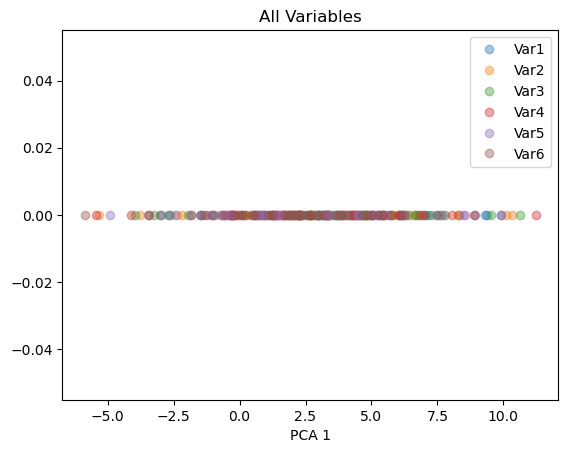

In [136]:
for key, group in df_1D.groupby(['Group']):
    plt.plot(group['projection'], np.zeros_like(group['projection']), alpha=0.4, 
             label=key, marker='o', linestyle='none')

plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(np.array(['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]))
plt.title('All Variables');